# 1. Download Training Data

In [21]:
# import libraries
import numpy as np
import pandas as pd
import requests

In [22]:
# Connect to Binance api to download training data, no need for keys or authentication, 
# but only accessible from physical machines(does not work on Google Cloud)

root_url = 'https://api.binance.com/api/v3/'

check_url = root_url + 'ping'

if requests.get(check_url).ok != True:
    print('!= 200')


In [23]:
# set api parameters including trading pairs, intervals, and desired timeframes

symbol = 'BTCUSDT' # 'BTCUSDT', 'ETHUSDT', etc.

interval = '1m' # '1m', '1h', '1d'

kline_url = root_url + 'klines'

params = {'interval':interval,
          'symbol':symbol,
          'endTime':1698796800000,
          #'limit':5
         }

In [24]:
# get api data as json

if requests.get(url=kline_url, params=params).ok != True:
    print('Issue with Binance kline API connectivity, did not fetch data')

api_data = requests.get(url=kline_url, params=params).json()

In [28]:
# save json to dataframe

df = pd.DataFrame(api_data)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
          'k_close_time', 'quote_asset_volume', 'num_trades',
          'taker_base_vol', 'taker_quote_vol', 'ignore']

In [26]:
for i in range(30):
    prev = df['Date'][0]
    # url_next = url + '&endTime=' + str(prev)
    params['endTime'] = str(prev)
    next_data = requests.get(url=kline_url, params=params).json()
    df_next = pd.DataFrame(next_data)
    df_next.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
          'k_close_time', 'quote_asset_volume', 'num_trades',
          'taker_base_vol', 'taker_quote_vol', 'ignore']
    df = pd.concat([df_next, df]).drop_duplicates()


In [29]:
df

,Date,Open,High,Low,Close,Volume,k_close_time,quote_asset_volume,num_trades,taker_base_vol,taker_quote_vol,ignore
0,1698766860000,34248.46000000,34248.46000000,34227.75000000,34230.07000000,31.82776000,1698766919999,1089650.29787280,1101,8.63201000,295520.27480510,0
1,1698766920000,34230.07000000,34232.01000000,34204.93000000,34205.97000000,34.29158000,1698766979999,1173416.45784520,1350,10.94978000,374657.32396270,0
2,1698766980000,34205.97000000,34205.97000000,34188.58000000,34199.65000000,47.43910000,1698767039999,1622169.79800020,1419,12.67752000,433479.32249870,0
3,1698767040000,34199.65000000,34220.00000000,34199.64000000,34207.85000000,23.22079000,1698767099999,794420.81853680,984,13.97497000,478106.22823340,0
4,1698767100000,34207.85000000,34234.42000000,34207.85000000,34218.12000000,29.11237000,1698767159999,996263.92106920,1157,16.80748000,575175.97288110,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1698796560000,34647.33000000,34647.33000000,34632.64000000,34642.58000000,19.42605000,1698796619999,672968.72912910,801,8.26838000,286419.90875700,0
496,1698796620000,34642.57000000,34658.35000000,34642.57000000,34658.34000000,31.23002000,1698796679999,1082139.33300520,817,28.41668000,984658.04035750,0
497,1698796680000,34658.34000000,34658.35000000,34658.34000000,34658.34000000,13.16276000,1698796739999,456199.51204200,359,10.06236000,348744.79470600,0
498,1698796740000,34658.35000000,34658.35000000,34639.77000000,34639.77000000,18.62235000,1698796799999,645214.96123690,718,6.22231000,215549.48753070,0


In [30]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume',
            'quote_asset_volume', 'num_trades',
            'taker_base_vol', 'taker_quote_vol', 'ignore']:
    df[col] = df[col].astype(float)

In [31]:
df

,Date,Open,High,Low,Close,Volume,k_close_time,quote_asset_volume,num_trades,taker_base_vol,taker_quote_vol,ignore
0,1698766860000,34248.46,34248.46,34227.75,34230.07,31.82776,1698766919999,1.089650e+06,1101.0,8.63201,295520.274805,0.0
1,1698766920000,34230.07,34232.01,34204.93,34205.97,34.29158,1698766979999,1.173416e+06,1350.0,10.94978,374657.323963,0.0
2,1698766980000,34205.97,34205.97,34188.58,34199.65,47.43910,1698767039999,1.622170e+06,1419.0,12.67752,433479.322499,0.0
3,1698767040000,34199.65,34220.00,34199.64,34207.85,23.22079,1698767099999,7.944208e+05,984.0,13.97497,478106.228233,0.0
4,1698767100000,34207.85,34234.42,34207.85,34218.12,29.11237,1698767159999,9.962639e+05,1157.0,16.80748,575175.972881,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1698796560000,34647.33,34647.33,34632.64,34642.58,19.42605,1698796619999,6.729687e+05,801.0,8.26838,286419.908757,0.0
496,1698796620000,34642.57,34658.35,34642.57,34658.34,31.23002,1698796679999,1.082139e+06,817.0,28.41668,984658.040357,0.0
497,1698796680000,34658.34,34658.35,34658.34,34658.34,13.16276,1698796739999,4.561995e+05,359.0,10.06236,348744.794706,0.0
498,1698796740000,34658.35,34658.35,34639.77,34639.77,18.62235,1698796799999,6.452150e+05,718.0,6.22231,215549.487531,0.0


# 2. Load Data & Packages

In [122]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score, accuracy_score
from sklearn.model_selection import train_test_split


In [123]:
# Read data from the CSV file into a DataFrame
data = pd.read_csv("/home/tony/code/oscarlee8787/price_prediction/raw_data/BTC-USD.csv")
print(data.head(0))

# Select specific columns from the DataFrame
data = data.loc[:,['Date','Open','High','Low','Close','Volume']]

print(data.head(5))
print(data.shape)


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []
         Date          Open          High           Low         Close  \
0  2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
1  2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2  2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
3  2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
4  2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   

        Volume  
0  10291200000  
1  16846600192  
2  16871900160  
3  21783199744  
4  23840899072  
(2157, 6)


In [124]:
# Set the 'Date' column as the index of the DataFrame
data = data.set_index('Date')
# Convert the index to datetime format
data.index = pd.to_datetime(data.index,unit='ns')
print(data.head)


<bound method NDFrame.head of                     Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...                  ...           ...           ...           ...   
2023-11-23  37420.433594  37643.917969  36923.863281  37289.621094   
2023-11-24  37296.316406  38415.339844  37261.605469  37720.281250   
2023-11-25  37721.414063  37892.429688  37617.417969  37796.792969   
2023-11-26  37796.828125  37820.300781  37162.750000  37479.121094   
2023-11-27  37454.191406  37550.773438  37164.511719  37305.851563   

                 Volume  
Date                     
2018-01

# 3. Preprocess Data

In [125]:
#Set the Target column
aim = 'Close'


In [126]:
# Determine the index for the 80-20 split
split_index = int(len(data) * 0.8)

# Split the data into training and testing sets
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    """
    Create a line plot with two lines.
    Parameters:
    - line1 (array-like): Data for the first line.
    - line2 (array-like): Data for the second line.
    - label1 (str, optional): Label for the first line (default is None).
    - label2 (str, optional): Label for the second line (default is None).
    - title (str, optional): Title of the plot (default is an empty string).
    - lw (int, optional): Line width for both lines (default is 2).
    """
    # Create a subplot with specified size
    fig, ax = plt.subplots(1, figsize=(13, 7))

    # Plot the first line with its label
    ax.plot(line1, label=label1, linewidth=lw)

    # Plot the second line with its label
    ax.plot(line2, label=label2, linewidth=lw)

    # Set y-axis label
    ax.set_ylabel('BTC/USDT', fontsize=14)

    # Set the title
    ax.set_title(title, fontsize=16)

    # Add a legend at the best location with the specified font size
    ax.legend(loc='best', fontsize=16)

    # Display the plot
    plt.show()


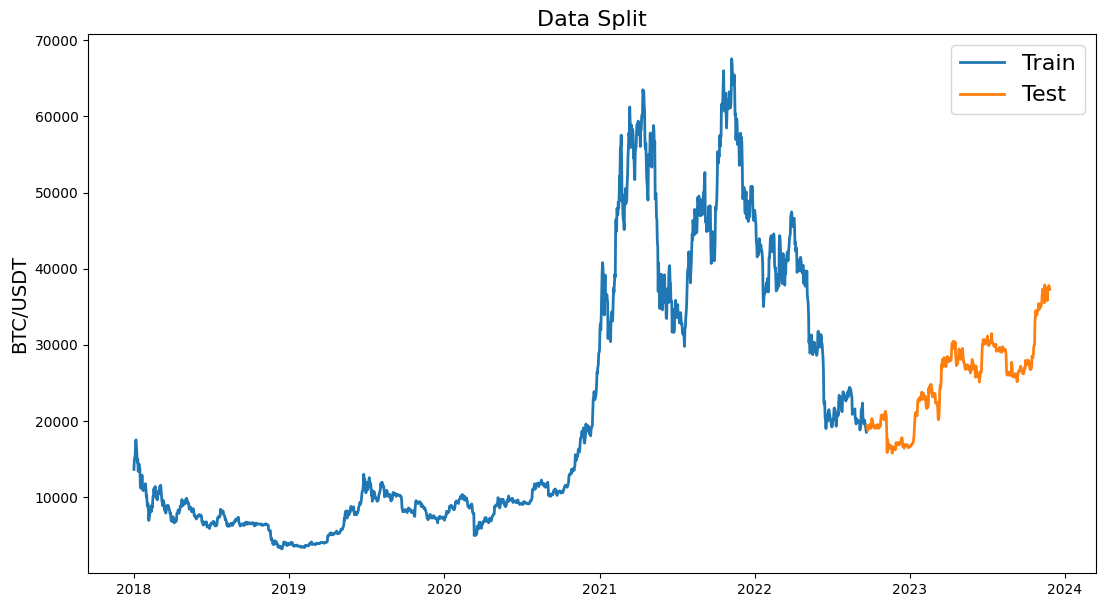

In [127]:
# Plotting the training and testing data for the 'Close' column
line_plot(train_data[aim], test_data[aim], label1='Train', label2='Test', title='Data Split')


In [128]:
# Function to normalize a continuous variable to a zero-base scale
def normalise_zero_base(continuous):
    """
    Normalize a continuous variable to a zero-base scale.
    Parameters:
    - continuous (pandas.Series): The continuous variable to be normalized.
    Returns:
    - pandas.Series: The normalized continuous variable.
    """
    # Normalize by dividing each value by the first value and subtracting 1
    return continuous / continuous.iloc[0] - 1


# Function to normalize a continuous variable to a min-max scale
def normalise_min_max(continuous):
    """
    Normalize a continuous variable to a min-max scale.
    Parameters:
    - continuous (pandas.Series): The continuous variable to be normalized.
    Returns:
    - pandas.Series: The normalized continuous variable.
    """
    # Normalize using min-max scaling formula
    return (continuous - continuous.min()) / (continuous.max() - continuous.min())


In [129]:
# Function to extract windowed data from a continuous variable
def extract_window_data(continuous, window_len=5, zero_base=True):
    """
    Extract windowed data from a continuous variable.
    Parameters:
    - continuous (pandas.Series): The continuous variable to extract windows from.
    - window_len (int, optional): The length of each window (default is 5).
    - zero_base (bool, optional): Whether to normalize each window to a zero-base scale (default is True).
    Returns:
    - numpy.ndarray: Array of windowed data.
    Example:
    >>> windowed_data = extract_window_data(data['Close'], window_len=10, zero_base=True)
    """
    # Initialize an empty list to store windowed data
    window_data = []

    # Iterate over the continuous variable to extract windows
    for idx in range(len(continuous) - window_len):
        # Extract a window of data
        tmp = continuous[idx: (idx + window_len)].copy()

        # Normalize the window to a zero-base scale if specified
        if zero_base:
            tmp = normalise_zero_base(tmp)

        # Append the window data to the list
        window_data.append(tmp.values)

    # Convert the list of windowed data to a numpy array
    return np.array(window_data)


In [130]:
# Function to prepare data for time series analysis
def prepare_data(continuous, aim, window_len=10, zero_base=True, test_size=0.2):
    """
    Prepare data for time series analysis.
    Parameters:
    - continuous (pandas.Series): The continuous variable for time series analysis.
    - aim (str): The target variable to predict.
    - window_len (int, optional): The length of each window (default is 10).
    - zero_base (bool, optional): Whether to normalize each window to a zero-base scale (default is True).
    - test_size (float, optional): The proportion of data to be used as the test set (default is 0.2).
    Returns:
    - tuple: A tuple containing train_data, test_data, X_train, X_test, y_train, y_test.
    """
    # Extract windowed data for training and testing sets
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)

    # Extract target variable for training and testing sets
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values

    # Normalize the target variable to a zero-base scale if specified
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1

    # Return the prepared data
    return train_data, test_data, X_train, X_test, y_train, y_test


# 4. LSTM Model

In [131]:
# Function to build an LSTM (Long Short-Term Memory) model# Function to build an LSTM (Long Short-Term Memory) model
def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    """
    Build an LSTM (Long Short-Term Memory) model.
    Parameters:
    - input_data (numpy.ndarray): The input data for the model.
    - output_size (int): The size of the output layer.
    - neurons (int): The number of neurons in the LSTM layer.
    - activ_func (str, optional): Activation function for the output layer (default is 'linear').
    - dropout (float, optional): Dropout rate to prevent overfitting (default is 0.2).
    - loss (str, optional): Loss function for model training (default is 'mse' - Mean Squared Error).
    - optimizer (str, optional): Optimization algorithm for model training (default is 'adam').
    Returns:
    - tensorflow.keras.models.Sequential: The constructed LSTM model.
    """
    # Create a Sequential model
    model = Sequential()

    # Add an LSTM layer with the specified number of neurons and input shape
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))

    # Add a Dropout layer to prevent overfitting
    model.add(Dropout(dropout))

    # Add a Dense layer with the specified number of units
    model.add(Dense(units=output_size))

    # Add an Activation layer with the specified activation function
    model.add(Activation(activ_func))

    # Compile the model with the specified loss function and optimizer
    model.compile(loss=loss, optimizer=optimizer)

    # Return the constructed LSTM model
    return model


In [132]:
# Define parameters for data preparation and LSTM model
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'
output_size=1

# Prepare data for time series analysis
train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
    data, aim, window_len=window_len, zero_base=zero_base, test_size=test_size)


In [133]:
print(X_train.shape)


(1720, 5, 5)


In [134]:
# Build an LSTM model
model = build_lstm_model(
    X_train, output_size=output_size, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)

# Train the LSTM model
modelfit = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False)


Epoch 1/20
54/54 [==============================] - 1s 8ms/step - loss: 0.0059 - val_loss: 0.0022
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 4/20
54/54 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 9.8901e-04
Epoch 5/20
54/54 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 6/20
54/54 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 8.6891e-04
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 8.8281e-04
Epoch 8/20
54/54 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 8.2344e-04
Epoch 9/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 7.4297e-04
Epoch 10/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 7.4821

# 5. Results

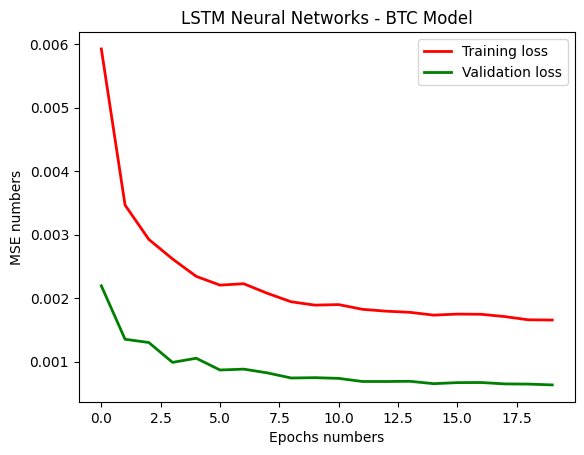

In [135]:
# Plotting the training and validation loss during model training
plt.plot(modelfit.history['loss'], 'r', linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g', linewidth=2, label='Validation loss')

# Set plot title and axis labels
plt.title('LSTM Neural Networks - BTC Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')

# Display legend to distinguish between training and validation loss
plt.legend()

# Show the plot
plt.show()


In [136]:
# Extract the target values from the test dataset
targets = test_data[aim][window_len:]

# Make predictions using the trained LSTM model on the test data
preds = model.predict(X_test).squeeze()

# Calculate the Mean Absolute Error (MAE) between predictions and actual targets
mae = mean_absolute_error(preds, y_test)

# Display the actual target values
targets.round()


14/14 [==============================] - 0s 4ms/step


Date
2022-09-27    19111.0
2022-09-28    19427.0
2022-09-29    19573.0
2022-09-30    19432.0
2022-10-01    19312.0
               ...   
2023-11-23    37290.0
2023-11-24    37720.0
2023-11-25    37797.0
2023-11-26    37479.0
2023-11-27    37306.0
Name: Close, Length: 427, dtype: float64

In [137]:
# Calculate the Mean Squared Error (MSE) between predictions and actual targets
SCORE_MSE = mean_squared_error(preds, y_test)

# Display the calculated MSE score
SCORE_MSE


0.0006338903972942312

In [138]:
# Calculate the R-squared (R2) score between actual targets and predicted values
r2_score = r2_score(y_test, preds)

# Multiply the R2 score by 100 for percentage representation
r2_score * 100


80.23904296432868

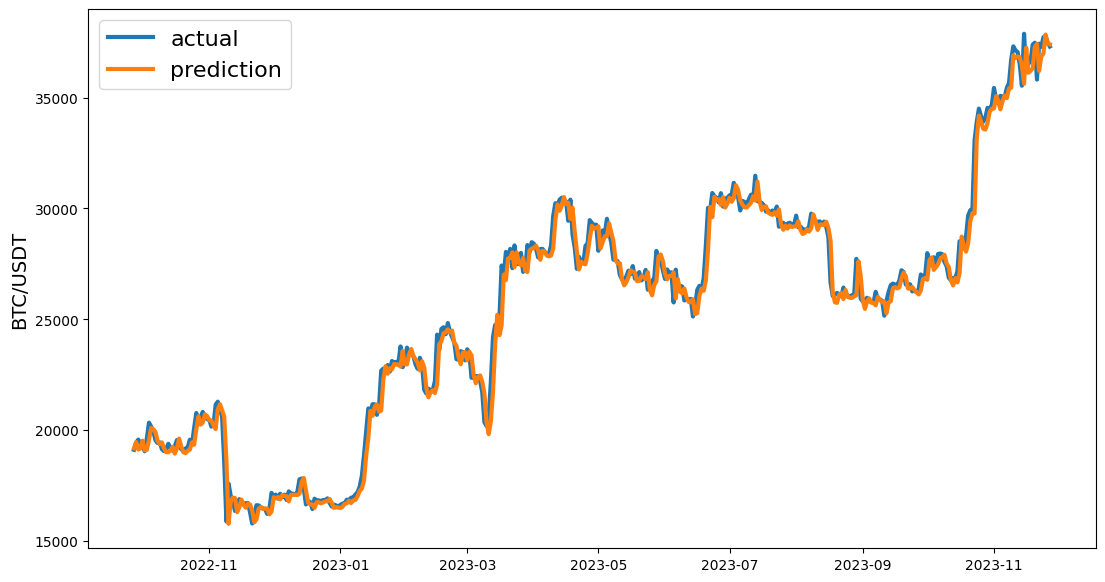

In [139]:
# Generate final predictions by reversing the normalization process
preds = test_data[aim].values[:-window_len] * (preds + 1)

# Create a pandas Series with index and data for predictions
preds = pd.Series(index=targets.index, data=preds)

# Plotting the actual and predicted values
line_plot(targets, preds, 'actual', 'prediction', lw=3)


# 6. Preprocess Data for Binary Classification 

In [140]:
# Assuming 'data' is the DataFrame containing time series data
data['aim_binary'] = (data['Close'] > data['Close'].shift(1)).astype(int)

# Drop NaN values introduced by the shift operation
data = data.dropna()
data.head()


,Open,High,Low,Close,Volume,aim_binary
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,10291200000,0
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,16846600192,1
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,16871900160,1
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,21783199744,1
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,23840899072,1


In [141]:
# def prepare_data_binary(continuous, aim, window_len=10, zero_base=True, test_size=0.2):
#     X_train = extract_window_data(train_data[continuous.columns], window_len, zero_base)
#     X_test = extract_window_data(test_data[continuous.columns], window_len, zero_base)
#     y_train = train_data[aim][window_len:].values
#     y_test = test_data[aim][window_len:].values
#     if zero_base:
#         y_train = y_train / train_data[aim][:-window_len].values - 1
#         y_test = y_test / test_data[aim][:-window_len].values - 1

#     return train_data, test_data, X_train, X_test, y_train, y_test


In [142]:
# Prepare data for binary classification
aim_binary = 'aim_binary'
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=[aim_binary]), data[aim_binary], test_size=0.2, shuffle=False)


# 7. Binary Classification Model

In [143]:
# Function to build a binary classification model
def build_binary_classification_model(input_data, output_size, neurons, activ_func='sigmoid', dropout=0.3, loss='binary_crossentropy', optimizer='adam'):
    model2 = Sequential()
    # Assuming your time series data has only one feature (e.g., 'Close' column)
    model2.add(LSTM(neurons, input_shape=(X_train.shape[1], 1)))  # Adjust the input shape
    model2.add(Dropout(dropout))
    model2.add(Dense(units=output_size))
    model2.add(Activation(activ_func))
    model2.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model2


In [144]:
# Specify parameters for the binary classification model
binary_lstm_neurons = 50
binary_epochs = 20
batch_size = 32


In [145]:
# Build the binary classification model
binary_model = build_binary_classification_model(X_train, output_size=1, neurons=binary_lstm_neurons)

# Train the binary classification model
binary_modelfit = binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=binary_epochs, batch_size=batch_size, verbose=1, shuffle=False)


Epoch 1/20
54/54 [==============================] - 2s 11ms/step - loss: 0.7219 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5255
Epoch 2/20
54/54 [==============================] - 0s 8ms/step - loss: 0.7100 - accuracy: 0.4980 - val_loss: 0.6953 - val_accuracy: 0.4745
Epoch 3/20
54/54 [==============================] - 0s 5ms/step - loss: 0.7100 - accuracy: 0.5026 - val_loss: 0.6958 - val_accuracy: 0.4745
Epoch 4/20
54/54 [==============================] - 0s 6ms/step - loss: 0.7116 - accuracy: 0.4806 - val_loss: 0.6965 - val_accuracy: 0.4745
Epoch 5/20
54/54 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.5020 - val_loss: 0.6963 - val_accuracy: 0.4745
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.7079 - accuracy: 0.4846 - val_loss: 0.6964 - val_accuracy: 0.4745
Epoch 7/20
54/54 [==============================] - 0s 5ms/step - loss: 0.7037 - accuracy: 0.4974 - val_loss: 0.6963 - val_accuracy: 0.4745
Epoch 8/20
54/54 [=

# 8. Binary Classification 

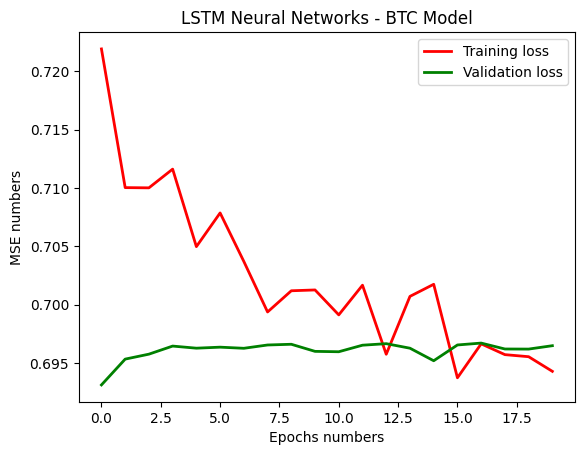

In [146]:
# Plotting the training and validation loss during model training
plt.plot(binary_modelfit.history['loss'], 'r', linewidth=2, label='Training loss')
plt.plot(binary_modelfit.history['val_loss'], 'g', linewidth=2, label='Validation loss')

# Set plot title and axis labels
plt.title('LSTM Neural Networks - BTC Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')

# Display legend to distinguish between training and validation loss
plt.legend()

# Show the plot
plt.show()


In [147]:
# Make predictions using the trained binary classification model on the test data
binary_preds = (binary_model.predict(X_test) > 0.5).astype(int)

# Extract the binary target values from the test dataset
binary_targets = y_test.astype(int)

# Display the actual binary target values
print("Actual Binary Targets:")
print(binary_targets)

# Display the predicted binary target values
print("Predicted Binary Targets:")
print(binary_preds)


14/14 [==============================] - 0s 1ms/step
Actual Binary Targets:
Date
2022-09-22    1
2022-09-23    0
2022-09-24    0
2022-09-25    0
2022-09-26    1
             ..
2023-11-23    0
2023-11-24    1
2023-11-25    1
2023-11-26    0
2023-11-27    0
Name: aim_binary, Length: 432, dtype: int64
Predicted Binary Targets:
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1

In [148]:
# Evaluate the binary classification model
binary_preds = (binary_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, binary_preds)
print(f'Accuracy: {accuracy}')


14/14 [==============================] - 0s 2ms/step
Accuracy: 0.47453703703703703
